

---



---


# **📌 UAS (FINALTERM) FOR MACHINE LEARNING**


# Classification : Fraud Detection (Deteksi Penipuan)


---



---




# **Import Required Libraries**

* Manipulasi Data: pandas dan numpy untuk mengolah data tabel dan angka.

* Visualisasi: matplotlib dan seaborn untuk membuat grafik.

* Machine Learning: sklearn untuk algoritma klasik (Logistic Regression, Random Forest), preprocessing (Scaling, Encoding), dan metrik evaluasi.

* Boosting: xgboost dan lightgbm (algoritma yang sangat kuat dan populer untuk data tabular).

* Deep Learning: tensorflow dan keras untuk membangun jaringan saraf tiruan (Neural Network).

* Class Imbalance: SMOTE dari library imblearn untuk menangani ketidakseimbangan data (penting dalam kasus fraud).

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, f1_score, accuracy_score,
    precision_score, recall_score
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks

# Class Imbalance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("All libraries imported successfully!")

All libraries imported successfully!


# **Load and Explore the Data**

* Memuat Dataset: Menggunakan pd.read_csv untuk membaca data latih (train_transaction.csv) dan data uji.

* Analisis Target (isFraud): Kode ini memeriksa seberapa tidak seimbangnya data. Hasilnya menunjukkan kasus penipuan sangat sedikit (sekitar 3.5%) dibandingkan transaksi normal. Ini adalah tantangan utama yang harus diselesaikan nanti.

In [ ]:
# Load datasets
train_df = pd.read_csv('train_transaction.csv')
test_df = pd.read_csv('test_transaction.csv')

print("Training data shape:", train_df.shape)
print("Test data shape:", test_df.shape)
print("\n" + "="*50)
print("First few rows of training data:")
train_df.head()

Training data shape: (590540, 394)
Test data shape: (506691, 393)

First few rows of training data:


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Basic information about the dataset
print("Training Data Information:")
print(train_df.info())
print("\n" + "="*50)
print("Statistical Summary:")
train_df.describe()

Training Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB
None

Statistical Summary:


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


# **Target variable distribution**
Kode ini melakukan analisis distribusi kelas pada variabel target isFraud. Pertama, kode menampilkan jumlah dan persentase transaksi fraud vs non-fraud. Lalu, visualisasi dibuat dalam bentuk bar chart (untuk jumlah) dan pie chart (untuk persentase). Terakhir, kode menghitung fraud ratio dan imbalance ratio, yang menunjukkan seberapa besar ketidakseimbangan antara transaksi fraud dan non-fraud dalam dataset. Hasil ini penting untuk menentukan strategi penanganan class imbalance sebelum membangun model prediksi.

Target Variable Distribution:
isFraud
0    569877
1     20663
Name: count, dtype: int64

Percentage Distribution:
isFraud
0    96.500999
1     3.499001
Name: proportion, dtype: float64


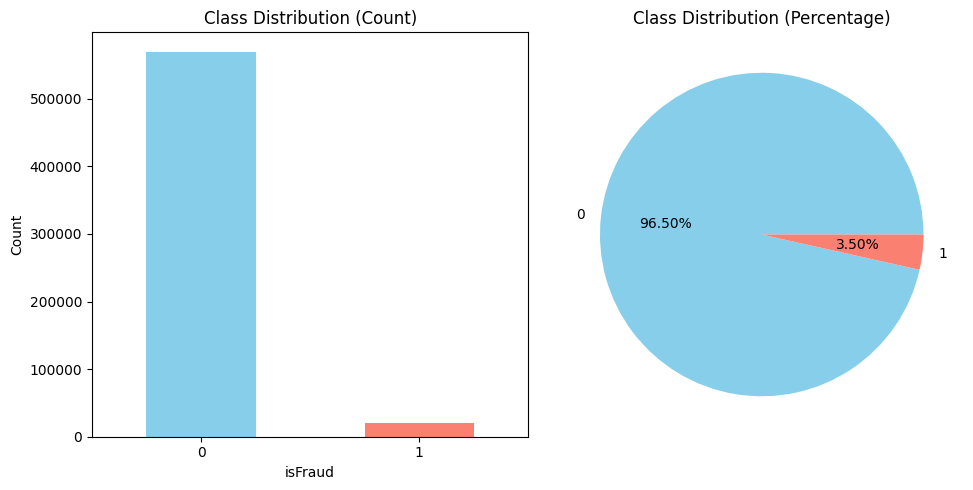


Fraud Ratio: 0.0350 (3.50%)
Imbalance Ratio: 1:28


In [ ]:
# Check target variable distribution
print("Target Variable Distribution:")
print(train_df['isFraud'].value_counts())
print("\nPercentage Distribution:")
print(train_df['isFraud'].value_counts(normalize=True) * 100)

# Visualize class distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
train_df['isFraud'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution (Count)')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
train_df['isFraud'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=['skyblue', 'salmon'])
plt.title('Class Distribution (Percentage)')
plt.ylabel('')

plt.tight_layout()
plt.show()

# Calculate class imbalance ratio
fraud_ratio = train_df['isFraud'].sum() / len(train_df)
print(f"\nFraud Ratio: {fraud_ratio:.4f} ({fraud_ratio*100:.2f}%)")
print(f"Imbalance Ratio: 1:{int(1/fraud_ratio)}")

# **Data Cleaning and Preprocessing**
* Cek Missing Values: Menghitung persentase data yang hilang.

* Pemisahan Fitur: Memisahkan target (y) dan fitur (X). Kolom TransactionID dibuang karena tidak relevan untuk prediksi pola.

* Identifikasi Tipe Kolom: Memisahkan kolom menjadi Kategori (teks/objek) dan Numerik (angka) agar bisa diproses dengan cara yang berbeda.

Missing Values in Training Data:
       Missing Count  Percentage
dist2         552913   93.628374
D7            551623   93.409930
D13           528588   89.509263
D14           528353   89.469469
D12           525823   89.041047
D6            517353   87.606767
D8            515614   87.312290
D9            515614   87.312290
V154          508595   86.123717
V153          508595   86.123717
V162          508595   86.123717
V161          508595   86.123717
V163          508595   86.123717
V155          508595   86.123717
V156          508595   86.123717
V138          508595   86.123717
V142          508595   86.123717
V149          508595   86.123717
V148          508595   86.123717
V147          508595   86.123717


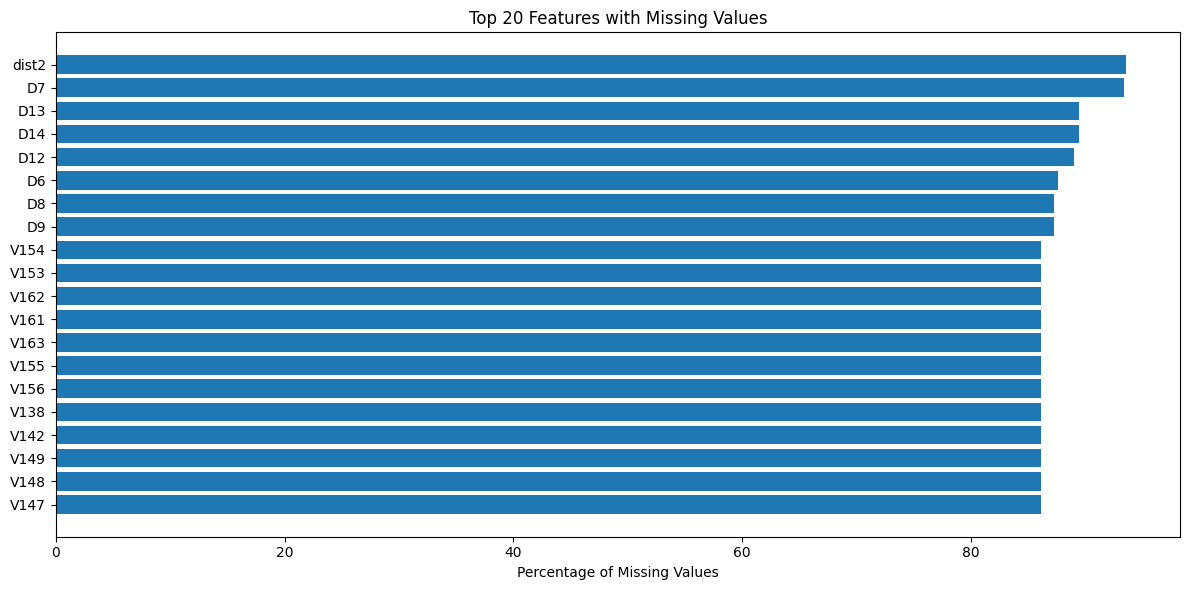

In [ ]:
# Check for missing values
print("Missing Values in Training Data:")
missing_train = train_df.isnull().sum()
missing_train_pct = (missing_train / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_train,
    'Percentage': missing_train_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df.head(20))

# Visualize missing values
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    top_missing = missing_df.head(20)
    plt.barh(range(len(top_missing)), top_missing['Percentage'])
    plt.yticks(range(len(top_missing)), top_missing.index)
    plt.xlabel('Percentage of Missing Values')
    plt.title('Top 20 Features with Missing Values')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

 * Kode ini memisahkan fitur (X) dan target (y) dari data, serta menyiapkan fitur uji (X_test) dan menyimpan ID transaksi (test_ids) untuk prediksi nanti.

In [ ]:
# Separate features and target
X = train_df.drop(['isFraud', 'TransactionID'], axis=1, errors='ignore')
y = train_df['isFraud']

# Store TransactionID for test data
test_ids = test_df['TransactionID'] if 'TransactionID' in test_df.columns else None
X_test = test_df.drop(['TransactionID'], axis=1, errors='ignore')

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Test features shape: {X_test.shape}")

Features shape: (590540, 392)
Target shape: (590540,)
Test features shape: (506691, 392)


* Kode ini mengidentifikasi kolom fitur kategorikal dan numerik, menghitung jumlah masing-masing, serta menampilkan beberapa contoh kolom dari setiap tipe.

In [ ]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Number of categorical features: {len(categorical_cols)}")
print(f"Number of numerical features: {len(numerical_cols)}")
print(f"\nCategorical features: {categorical_cols[:10]}...") if len(categorical_cols) > 10 else print(f"\nCategorical features: {categorical_cols}")
print(f"\nNumerical features: {numerical_cols[:10]}...") if len(numerical_cols) > 10 else print(f"\nNumerical features: {numerical_cols}")

Number of categorical features: 14
Number of numerical features: 378

Categorical features: ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5']...

Numerical features: ['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2']...


# **Feature Engineering and Selection**

Fungsi preprocess_data: Fungsi ini melakukan transformasi krusial

* Label Encoding: Mengubah data teks menjadi angka agar dimengerti komputer.

* Imputasi: Mengisi nilai yang kosong (missing values) dengan nilai median (nilai tengah).

* Scaling: Menstandarkan skala angka (menggunakan StandardScaler) agar fitur dengan nilai besar tidak mendominasi model.

* Seleksi Fitur: Menghapus kolom yang memiliki nilai kosong di atas 80% (high_missing_cols), karena dianggap tidak membawa informasi yang cukup.

In [ ]:
# Function to preprocess data
def preprocess_data(df_train, df_test, categorical_features, numerical_features):
    """
    Preprocess training and test data:
    1. Handle categorical variables (Label Encoding)
    2. Handle missing values (Imputation)
    3. Feature scaling (Standardization)
    """
    # Make copies
    train_processed = df_train.copy()
    test_processed = df_test.copy()

    # 1. Encode categorical variables
    label_encoders = {}
    for col in categorical_features:
        if col in train_processed.columns:
            le = LabelEncoder()
            # Fit on train data
            train_processed[col] = train_processed[col].fillna('missing')
            le.fit(train_processed[col].astype(str))
            train_processed[col] = le.transform(train_processed[col].astype(str))

            # Transform test data (handle unseen labels)
            if col in test_processed.columns:
                test_processed[col] = test_processed[col].fillna('missing')
                test_processed[col] = test_processed[col].astype(str).apply(
                    lambda x: x if x in le.classes_ else 'missing'
                )
                test_processed[col] = le.transform(test_processed[col])

            label_encoders[col] = le

    # 2. Handle missing values in numerical features
    imputer = SimpleImputer(strategy='median')

    if len(numerical_features) > 0:
        train_processed[numerical_features] = imputer.fit_transform(train_processed[numerical_features])
        test_processed[numerical_features] = imputer.transform(test_processed[numerical_features])

    # 3. Feature scaling
    scaler = StandardScaler()

    if len(numerical_features) > 0:
        train_processed[numerical_features] = scaler.fit_transform(train_processed[numerical_features])
        test_processed[numerical_features] = scaler.transform(test_processed[numerical_features])

    return train_processed, test_processed, label_encoders, imputer, scaler

# Apply preprocessing
X_processed, X_test_processed, encoders, imputer, scaler = preprocess_data(
    X, X_test, categorical_cols, numerical_cols
)

print("Preprocessing completed!")
print(f"Processed training features shape: {X_processed.shape}")
print(f"Processed test features shape: {X_test_processed.shape}")

Preprocessing completed!
Processed training features shape: (590540, 392)
Processed test features shape: (506691, 392)


* Kode ini memilih fitur dengan menghapus kolom yang memiliki lebih dari 80% nilai hilang, sehingga mengurangi jumlah fitur yang tidak informatif sebelum pemrosesan lebih lanjut.

In [ ]:
# Feature selection - Remove features with too many missing values or low variance
# Calculate missing percentage before preprocessing
missing_pct = (X.isnull().sum() / len(X)) * 100
high_missing_cols = missing_pct[missing_pct > 80].index.tolist()

print(f"Features with >80% missing values: {len(high_missing_cols)}")

# Drop high missing columns
if len(high_missing_cols) > 0:
    X_processed = X_processed.drop(high_missing_cols, axis=1, errors='ignore')
    X_test_processed = X_test_processed.drop(high_missing_cols, axis=1, errors='ignore')
    print(f"After removing high missing features: {X_processed.shape}")

Features with >80% missing values: 55
After removing high missing features: (590540, 337)


# **Train-Validation Split**

Kode ini membagi data menjadi set pelatihan dan validasi dengan proporsi 80:20, menjaga distribusi kelas target (isFraud) agar seimbang di kedua set melalui stratifikasi.

In [ ]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"\nTraining set fraud distribution:\n{y_train.value_counts()}")
print(f"\nValidation set fraud distribution:\n{y_val.value_counts()}")

Training set size: (472432, 337)
Validation set size: (118108, 337)

Training set fraud distribution:
isFraud
0    455902
1     16530
Name: count, dtype: int64

Validation set fraud distribution:
isFraud
0    113975
1      4133
Name: count, dtype: int64


# **Handle Class Imbalance with SMOTE**

Kode ini menerapkan SMOTE untuk menyeimbangkan data pelatihan, sehingga jumlah kasus fraud dan non-fraud menjadi seimbang. Sebelum SMOTE, kelas fraud sedikit; setelah SMOTE, kedua kelas memiliki jumlah yang sama.

In [ ]:
# Apply SMOTE to balance the training data
print("Applying SMOTE to balance the training data...")
print(f"Before SMOTE - Training set: {X_train.shape}, Fraud cases: {y_train.sum()}")

smote = SMOTE(random_state=42, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"After SMOTE - Training set: {X_train_balanced.shape}, Fraud cases: {y_train_balanced.sum()}")
print(f"\nClass distribution after SMOTE:\n{pd.Series(y_train_balanced).value_counts()}")

Applying SMOTE to balance the training data...
Before SMOTE - Training set: (472432, 337), Fraud cases: 16530
After SMOTE - Training set: (911804, 337), Fraud cases: 455902

Class distribution after SMOTE:
isFraud
0    455902
1    455902
Name: count, dtype: int64


# **Machine Learning Models**

Kode ini membuat fungsi untuk melatih dan mengevaluasi model klasifikasi. Fungsi ini:

* Melatih model pada data pelatihan (X_train, y_train).

* Memprediksi label dan probabilitas pada data validasi (X_val).

* Menghitung metrik evaluasi: Accuracy, Precision, Recall, F1-Score, dan ROC-AUC.

* Menampilkan confusion matrix untuk melihat jumlah prediksi benar dan salah per kelas.

* Mengembalikan semua metrik, prediksi, probabilitas, dan confusion matrix dalam bentuk dictionary untuk analisis lebih lanjut.

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    """
    Train and evaluate a model, returning metrics and predictions
    """
    print(f"\n{'='*60}")
    print(f"Training {model_name}...")
    print(f"{'='*60}")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)

    # Print results
    print(f"\n{model_name} Results:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)

    return {
        'model': model,
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'confusion_matrix': cm
    }

# **Logistic Regression**
Kode ini membuat model Logistic Regression, melatihnya dengan data training yang sudah seimbang, mengevaluasi performanya pada data validasi, dan menyimpan metrik serta prediksi hasilnya.

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
lr_results = evaluate_model(lr_model, X_train_balanced, y_train_balanced, X_val, y_val, "Logistic Regression")


Training Logistic Regression...

Logistic Regression Results:
Accuracy:  0.8215
Precision: 0.1255
Recall:    0.6874
F1-Score:  0.2123
ROC-AUC:   0.8376

Confusion Matrix:
[[94184 19791]
 [ 1292  2841]]


# **Random Forest**

Kode ini membuat model Random Forest, melatihnya menggunakan data training yang sudah seimbang, mengevaluasi performanya pada data validasi, dan menyimpan metrik serta prediksi hasilnya.

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_results = evaluate_model(rf_model, X_train_balanced, y_train_balanced, X_val, y_val, "Random Forest")


Training Random Forest...

Random Forest Results:
Accuracy:  0.9245
Precision: 0.2616
Recall:    0.6349
F1-Score:  0.3705
ROC-AUC:   0.8831

Confusion Matrix:
[[106569   7406]
 [  1509   2624]]


# **XGBoost**

Kode ini membuat model XGBoost, melatihnya dengan data training yang sudah seimbang, mengevaluasi performanya pada data validasi, dan menyimpan metrik serta prediksi hasilnya.

In [ ]:
# XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)
xgb_results = evaluate_model(xgb_model, X_train_balanced, y_train_balanced, X_val, y_val, "XGBoost")


Training XGBoost...

XGBoost Results:
Accuracy:  0.9618
Precision: 0.4602
Recall:    0.5354
F1-Score:  0.4950
ROC-AUC:   0.8935

Confusion Matrix:
[[111379   2596]
 [  1920   2213]]


# **LightGBM**

Kode ini membuat model LightGBM, melatihnya dengan data training yang sudah seimbang, mengevaluasi performanya pada data validasi, dan menyimpan metrik serta prediksi hasilnya.

In [ ]:
# LightGBM
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)
lgbm_results = evaluate_model(lgbm_model, X_train_balanced, y_train_balanced, X_val, y_val, "LightGBM")


Training LightGBM...

LightGBM Results:
Accuracy:  0.9619
Precision: 0.4611
Recall:    0.5221
F1-Score:  0.4897
ROC-AUC:   0.8872

Confusion Matrix:
[[111453   2522]
 [  1975   2158]]


# **Build Deep Learning Model**

Kode ini membangun model Neural Network untuk klasifikasi biner. Model terdiri dari beberapa lapisan Dense dengan aktivasi ReLU, diselingi Batch Normalization dan Dropout untuk mencegah overfitting. Lapisan terakhir menggunakan aktivasi sigmoid untuk memprediksi probabilitas kelas “fraud”. Model dikompilasi dengan optimizer Adam, loss function binary crossentropy, dan metrik evaluasi berupa akurasi, AUC, presisi, dan recall.

In [ ]:
# Build Neural Network
def build_neural_network(input_dim):
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),

        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.AUC(name='auc'),
                 keras.metrics.Precision(name='precision'),
                 keras.metrics.Recall(name='recall')]
    )

    return model

# Create the model
nn_model = build_neural_network(X_train_balanced.shape[1])
nn_model.summary()

# **Train Model**

Kode ini melatih Neural Network yang telah dibuat menggunakan data training yang sudah seimbang. EarlyStopping digunakan untuk menghentikan pelatihan jika val_loss tidak membaik selama 10 epoch, sehingga mencegah overfitting. ReduceLROnPlateau menurunkan laju belajar jika val_loss stagnan selama 5 epoch. Model dilatih selama maksimal 50 epoch dengan batch size 256, sambil memonitor performa pada data validasi.

In [ ]:
# Define callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

# Train the model
print("Training Neural Network...")
history = nn_model.fit(
    X_train_balanced, y_train_balanced,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# **Plot Training**

Kode ini menampilkan grafik performa pelatihan Neural Network selama setiap epoch. Empat plot yang dibuat adalah:

* Loss: menunjukkan perubahan nilai loss untuk data training dan validasi, berguna untuk memantau konvergensi dan overfitting.

* Accuracy: menampilkan akurasi model pada data training dan validasi, untuk melihat kemampuan model memprediksi kelas dengan benar.

* AUC: menggambarkan Area Under Curve dari ROC, untuk menilai kemampuan model membedakan antara kelas fraud dan non-fraud.

* Precision & Recall: menampilkan presisi dan recall untuk data training dan validasi, penting untuk menilai keseimbangan antara deteksi fraud yang benar dan minimnya false positives.

In [ ]:
# Plot training history
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Loss
axes[0, 0].plot(history.history['loss'], label='Train Loss')
axes[0, 0].plot(history.history['val_loss'], label='Val Loss')
axes[0, 0].set_title('Model Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Accuracy
axes[0, 1].plot(history.history['accuracy'], label='Train Accuracy')
axes[0, 1].plot(history.history['val_accuracy'], label='Val Accuracy')
axes[0, 1].set_title('Model Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True)

# AUC
axes[1, 0].plot(history.history['auc'], label='Train AUC')
axes[1, 0].plot(history.history['val_auc'], label='Val AUC')
axes[1, 0].set_title('Model AUC')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('AUC')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Precision & Recall
axes[1, 1].plot(history.history['precision'], label='Train Precision')
axes[1, 1].plot(history.history['val_precision'], label='Val Precision')
axes[1, 1].plot(history.history['recall'], label='Train Recall')
axes[1, 1].plot(history.history['val_recall'], label='Val Recall')
axes[1, 1].set_title('Precision & Recall')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Score')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# **Evaluasi Model**

Kode ini mengevaluasi performa Neural Network pada data validasi. Model memprediksi probabilitas kelas fraud, kemudian dikonversi menjadi prediksi biner menggunakan threshold 0.5.

Setelah itu, dihitung beberapa metrik penting:

* Accuracy: proporsi prediksi benar.

* Precision: kemampuan model memprediksi fraud dengan benar dari seluruh prediksi fraud.

* Recall: kemampuan model mendeteksi semua kasus fraud yang sebenarnya.

* F1-Score: rata-rata harmonis precision dan recall.

* ROC-AUC: kemampuan model membedakan kelas fraud dan non-fraud secara keseluruhan.

In [ ]:
# Evaluate Neural Network
print("\n" + "="*60)
print("Evaluating Neural Network...")
print("="*60)

# Predictions
y_pred_nn_proba = nn_model.predict(X_val).flatten()
y_pred_nn = (y_pred_nn_proba > 0.5).astype(int)

# Calculate metrics
nn_accuracy = accuracy_score(y_val, y_pred_nn)
nn_precision = precision_score(y_val, y_pred_nn)
nn_recall = recall_score(y_val, y_pred_nn)
nn_f1 = f1_score(y_val, y_pred_nn)
nn_roc_auc = roc_auc_score(y_val, y_pred_nn_proba)

print(f"\nNeural Network Results:")
print(f"Accuracy:  {nn_accuracy:.4f}")
print(f"Precision: {nn_precision:.4f}")
print(f"Recall:    {nn_recall:.4f}")
print(f"F1-Score:  {nn_f1:.4f}")
print(f"ROC-AUC:   {nn_roc_auc:.4f}")

# Confusion Matrix
nn_cm = confusion_matrix(y_val, y_pred_nn)
print(f"\nConfusion Matrix:")
print(nn_cm)

# Store results
nn_results = {
    'model': nn_model,
    'model_name': 'Neural Network',
    'accuracy': nn_accuracy,
    'precision': nn_precision,
    'recall': nn_recall,
    'f1_score': nn_f1,
    'roc_auc': nn_roc_auc,
    'y_pred': y_pred_nn,
    'y_pred_proba': y_pred_nn_proba,
    'confusion_matrix': nn_cm
}

# **Model Comparison**

Kode ini menggabungkan semua hasil evaluasi model klasifikasi ke dalam satu tabel perbandingan. Setiap model dibandingkan berdasarkan metrik penting: Accuracy, Precision, Recall, F1-Score, dan ROC-AUC.

Setelah itu, kode menentukan model terbaik berdasarkan skor ROC-AUC tertinggi, yang menunjukkan kemampuan model paling baik dalam membedakan transaksi fraud dan non-fraud. Hasil disajikan secara ringkas untuk memudahkan pemilihan model.

In [ ]:
# Compile all results
all_results = [lr_results, rf_results, xgb_results, lgbm_results]

# Create comparison dataframe
comparison_df = pd.DataFrame([
    {
        'Model': result['model_name'],
        'Accuracy': result['accuracy'],
        'Precision': result['precision'],
        'Recall': result['recall'],
        'F1-Score': result['f1_score'],
        'ROC-AUC': result['roc_auc']
    }
    for result in all_results
])

print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(comparison_df.to_string(index=False))
print("\n" + "="*80)

# Find best model
best_model_idx = comparison_df['ROC-AUC'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
print(f"\nBest Model (by ROC-AUC): {best_model_name}")
print(f"ROC-AUC Score: {comparison_df.loc[best_model_idx, 'ROC-AUC']:.4f}")


MODEL COMPARISON SUMMARY
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.821494   0.125530 0.687394  0.212292 0.837562
      Random Forest  0.924518   0.261615 0.634890  0.370543 0.883094
            XGBoost  0.961764   0.460179 0.535446  0.494968 0.893464
           LightGBM  0.961925   0.461111 0.522139  0.489731 0.887229


Best Model (by ROC-AUC): XGBoost
ROC-AUC Score: 0.8935


# **Visualize model comparison**

Kode ini memvisualisasikan perbandingan kinerja semua model klasifikasi dengan menggunakan bar chart untuk masing-masing metrik: Accuracy, Precision, Recall, F1-Score, dan ROC-AUC.

Setiap bar menunjukkan skor model pada metrik tertentu, dengan nilai ditampilkan di atas bar. Plot terakhir dikosongkan karena jumlah metrik lebih sedikit dari jumlah subplot. Visualisasi ini memudahkan identifikasi model terbaik dan kelemahan masing-masing model secara cepat.



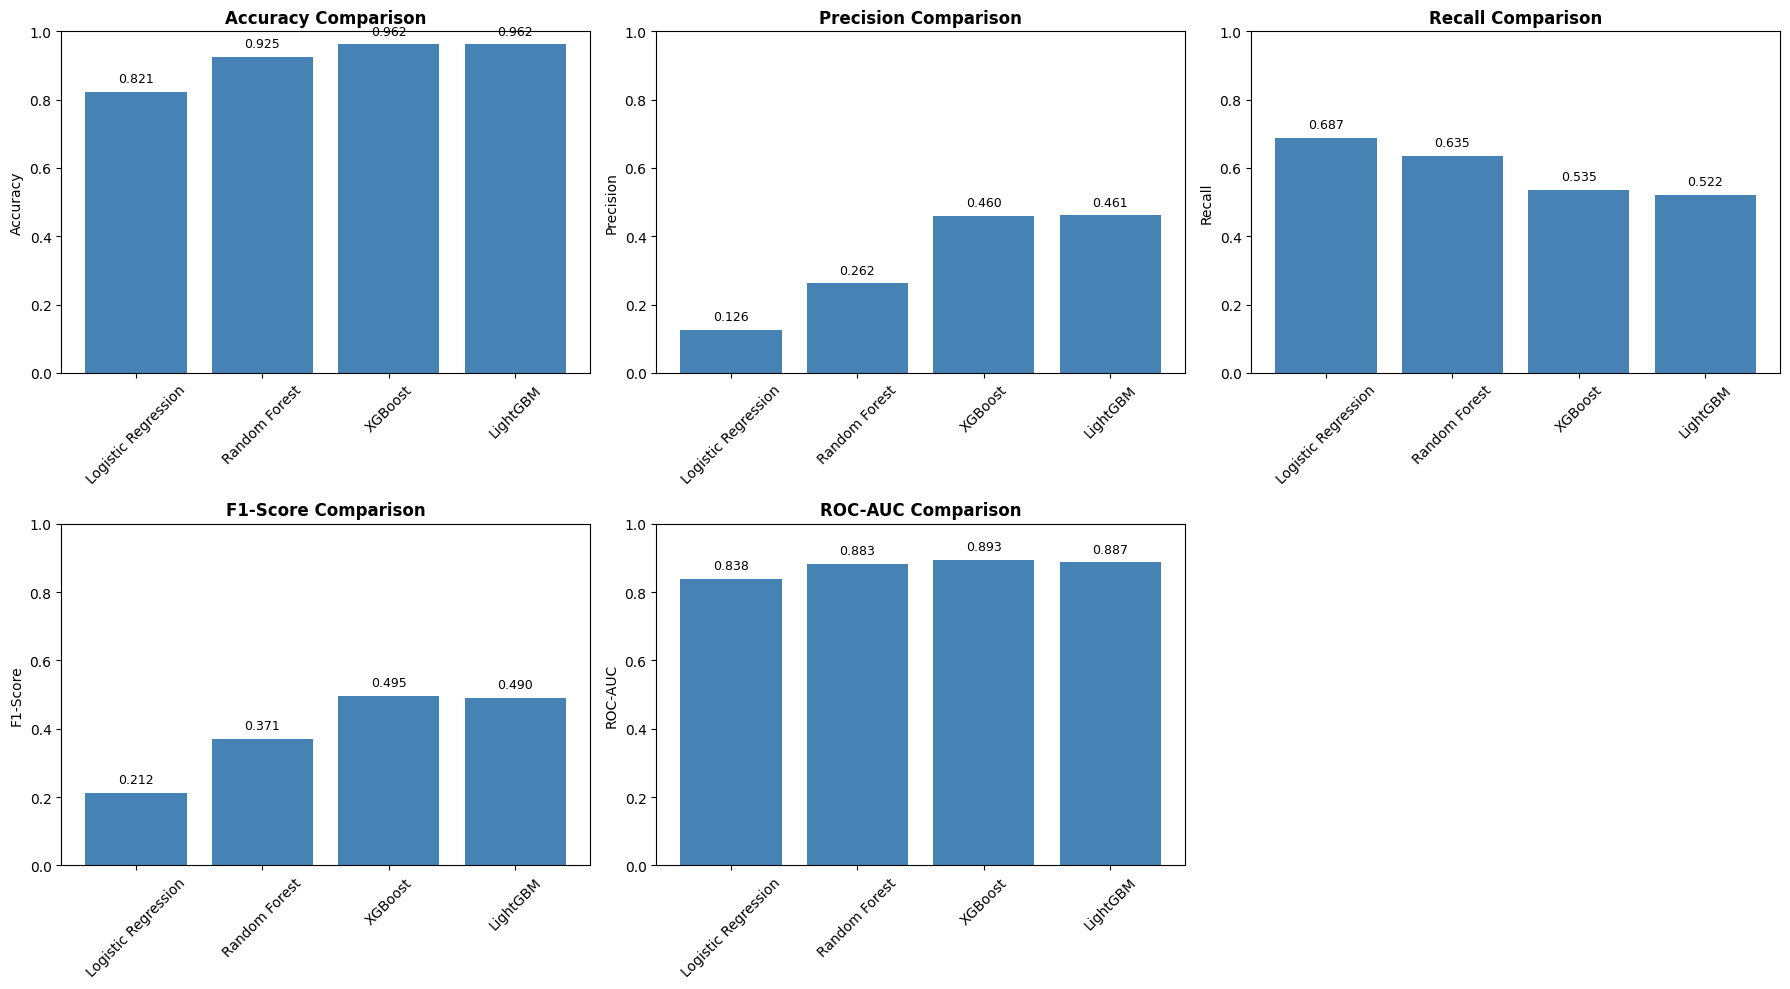

In [ ]:
# Visualize model comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for idx, metric in enumerate(metrics):
    row = idx // 3
    col = idx % 3

    axes[row, col].bar(comparison_df['Model'], comparison_df[metric], color='steelblue')
    axes[row, col].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel(metric)
    axes[row, col].set_ylim([0, 1])
    axes[row, col].tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for i, v in enumerate(comparison_df[metric]):
        axes[row, col].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

# Hide the last subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# **ROC Curve Comparison**

Kode ini menggambar ROC curve untuk semua model klasifikasi sekaligus, sehingga kita bisa membandingkan kemampuan setiap model dalam membedakan kelas fraud dan non-fraud.

Sumbu x mewakili False Positive Rate (FPR) dan sumbu y mewakili True Positive Rate (TPR). Garis diagonal hitam menunjukkan performa classifier acak. Setiap kurva berwarna mewakili model tertentu dengan nilai AUC (Area Under the Curve) ditampilkan di legend. Semakin mendekati sudut kiri atas kurva, semakin baik kemampuan model dalam klasifikasi.

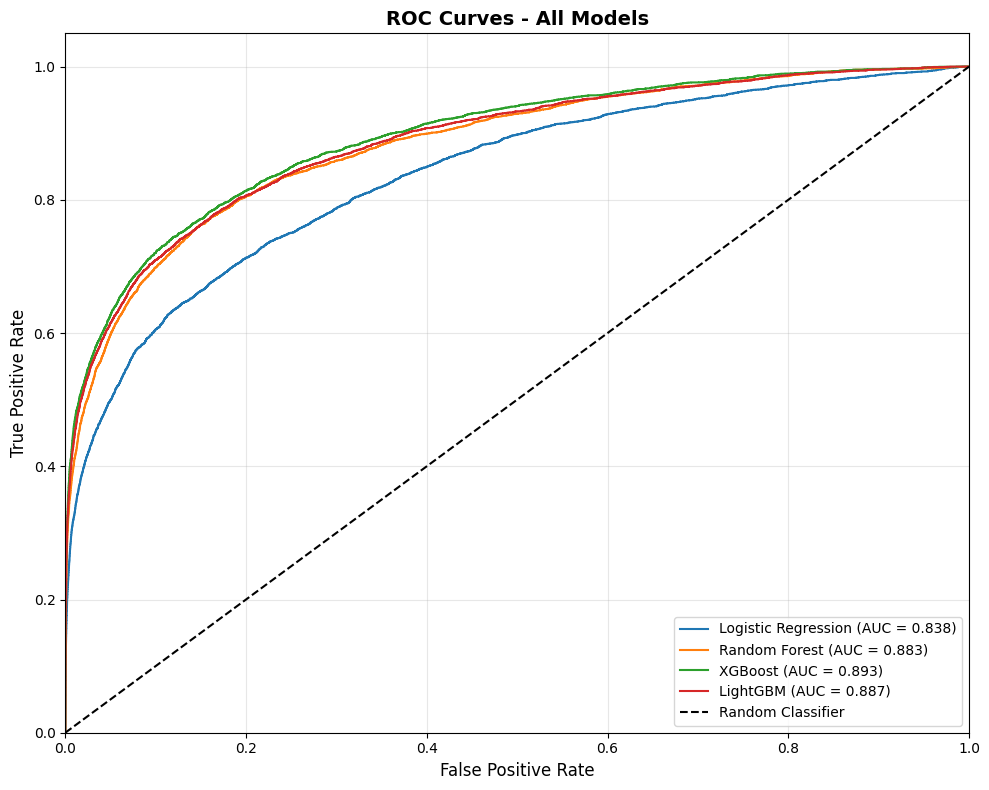

In [ ]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

for result in all_results:
    fpr, tpr, _ = roc_curve(y_val, result['y_pred_proba'])
    plt.plot(fpr, tpr, label=f"{result['model_name']} (AUC = {result['roc_auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# **Confusion Matrix Visualization**

Kode ini menampilkan confusion matrix untuk semua model klasifikasi dalam bentuk heatmap.

Setiap subplot menunjukkan jumlah true positives, true negatives, false positives, dan false negatives untuk masing-masing model. Judul subplot juga menampilkan F1-Score model tersebut. Dengan visualisasi ini, kita bisa melihat performa setiap model dalam mengklasifikasikan kasus fraud dan non-fraud, serta membandingkan kesalahan prediksi antar model.

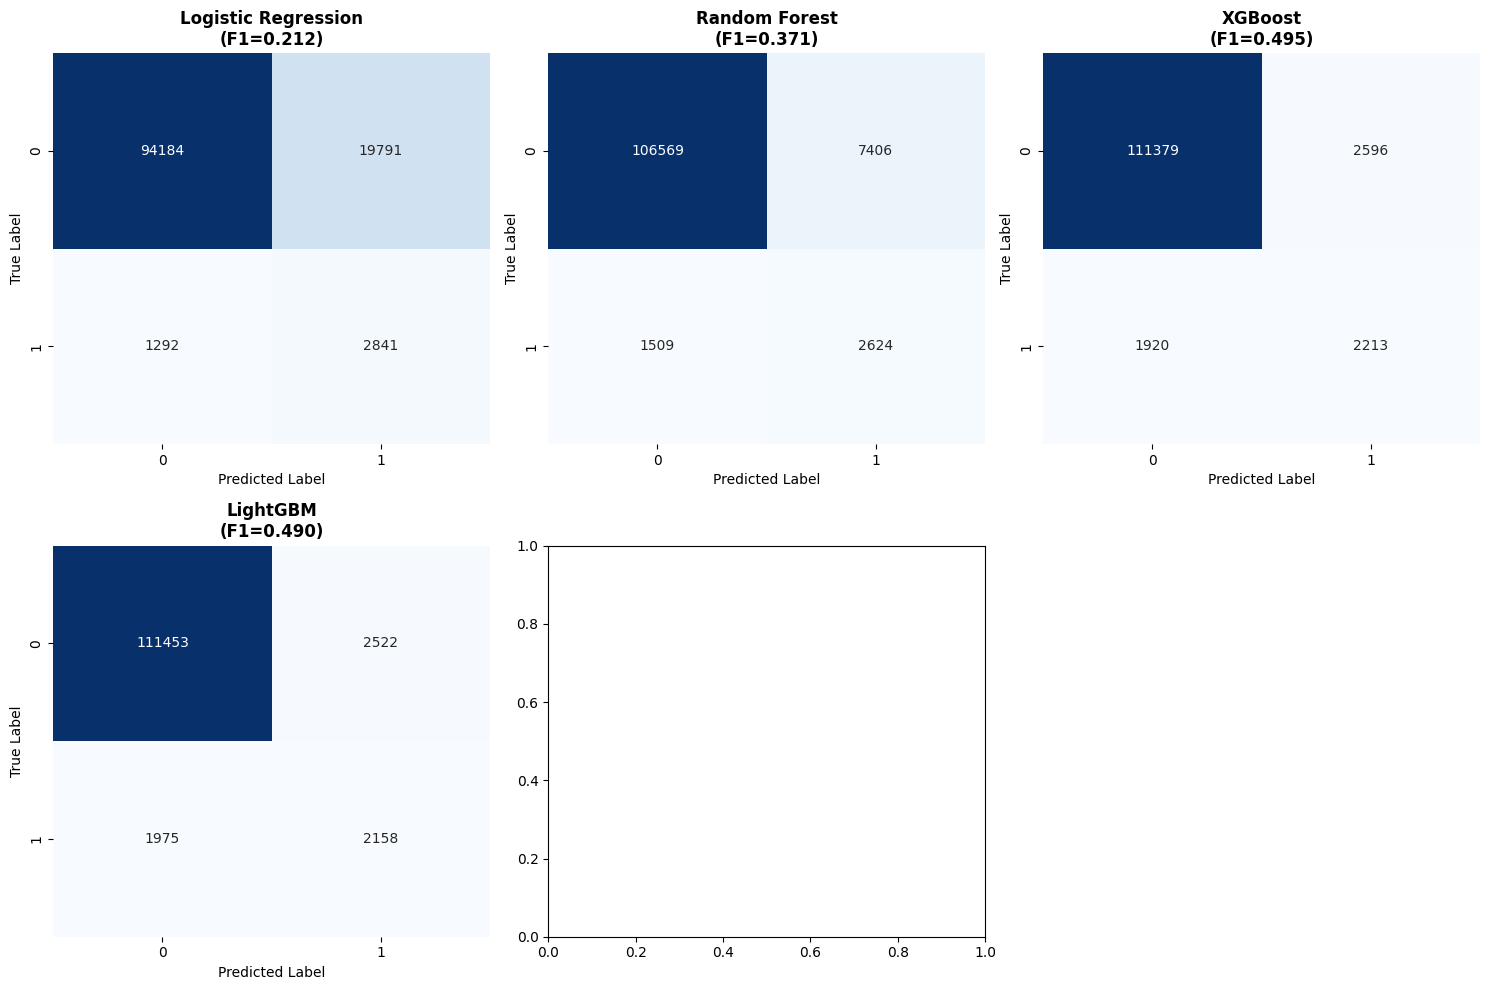

In [ ]:
# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, result in enumerate(all_results):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                ax=axes[idx], cbar=False)
    axes[idx].set_title(f"{result['model_name']}\n(F1={result['f1_score']:.3f})",
                        fontweight='bold')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

# Hide the last subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

# **Feature Importance**

Kode ini menampilkan fitur-fitur paling berpengaruh menurut model.

Pertama, kode mengambil nilai feature importance dari model Random Forest dan menyusunnya dalam dataframe. Kemudian, 20 fitur teratas divisualisasikan dalam bar chart horizontal, diurutkan dari yang paling penting ke paling tidak penting. Visualisasi ini membantu memahami variabel mana yang paling berpengaruh dalam memprediksi fraud. Daftar 20 fitur teratas juga dicetak untuk referensi.

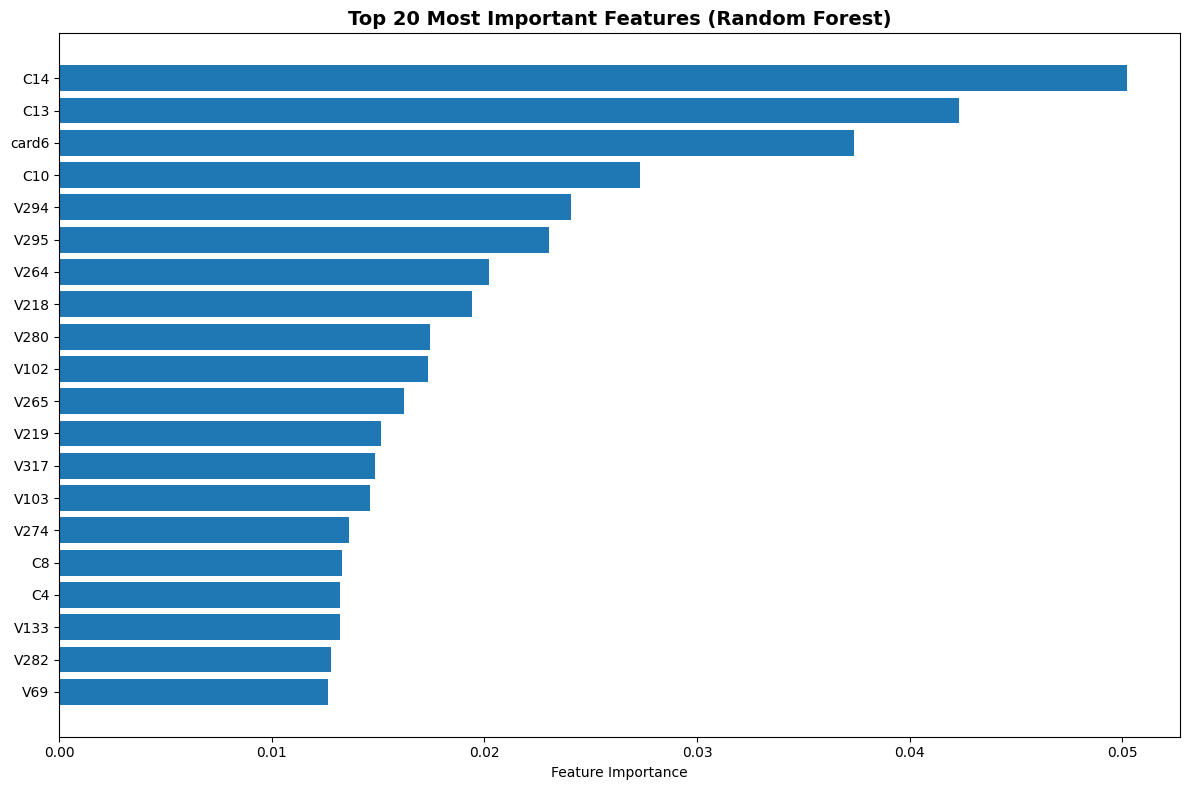

Top 20 Most Important Features:
    feature  importance
27      C14    0.050200
26      C13    0.042335
8     card6    0.037361
23      C10    0.027295
309    V294    0.024075
310    V295    0.023031
279    V264    0.020225
233    V218    0.019392
295    V280    0.017452
146    V102    0.017362
280    V265    0.016236
234    V219    0.015114
332    V317    0.014854
147    V103    0.014609
289    V274    0.013635
21       C8    0.013310
17       C4    0.013219
177    V133    0.013187
297    V282    0.012760
113     V69    0.012627


In [ ]:
# Plot feature importance for Random Forest
feature_names = X_processed.columns

# Get feature importance from Random Forest
rf_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_results['model'].feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
top_features = rf_importance.head(20)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Top 20 Most Important Features:")
print(rf_importance.head(20))

# **Summary and Conclusions**

FRAUD DETECTION PROJECT SUMMARY

1. Dataset Statistics:
   - Training samples: 590540
   - Test samples: 506691
   - Original features: 392
   - Processed features: 337
   - Fraud rate in training: 3.50%

2. Models Evaluated:
   1. Logistic Regression
   2. Random Forest
   3. XGBoost
   4. LightGBM

3. Best Model: XGBoost
   - ROC-AUC: 0.8935
   - F1-Score: 0.4950
   - Precision: 0.4602
   - Recall: 0.5354

4. Key Techniques Used:
   - Data preprocessing (encoding, imputation, scaling)
   - Class imbalance handling (SMOTE)
   - Multiple ML algorithms (Logistic, RF, XGBoost, LightGBM)
   - Deep Learning (Neural Network with dropout and batch norm)
   - Comprehensive evaluation metrics

5. Output:
   - Submission file: fraud_detection_submission.csv
   - Contains 506691 predictions